# Legacy Zeropoints vs. Obsdb

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import fitsio
import glob
import os
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from photutils import (CircularAperture, CircularAnnulus,
                               aperture_photometry, daofind)

from astrometry.util.fits import fits_table, merge_tables

In [10]:
from obiwan.common import fits2pandas

In [4]:
mosaic= fits_table("matched_mosaic_obsdb_1000.fits")
decam= fits_table("matched_decam_obsdb_1000.fits")

In [7]:
mosaic

<tabledata object with 1000 rows and 16 columns: db_tneed, zp_mjd, db_band, zp_skymag, db_seeing, zp_transp, db_expf, zp_fwhm, zp_tneed_med, db_sky, db_zeropoint, zp_band, zp_gain, db_transparency, zp_tneed_std, zp_zpt>

In [6]:
mosaic.get_columns()

['zp_mjd',
 'db_band',
 'zp_skymag',
 'zp_transp',
 'zp_band',
 'db_zeropoint',
 'zp_fwhm',
 'zp_gain',
 'zp_tneed_med',
 'db_sky',
 'db_seeing',
 'db_expf',
 'db_tneed',
 'db_transparency',
 'zp_tneed_std',
 'zp_zpt']

In [11]:
mos= fits2pandas(mosaic)

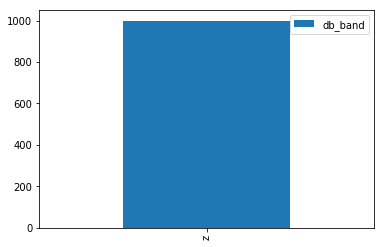

In [66]:
val_cnts= mos['db_band'].value_counts().to_frame()
val_cnts.plot.bar()

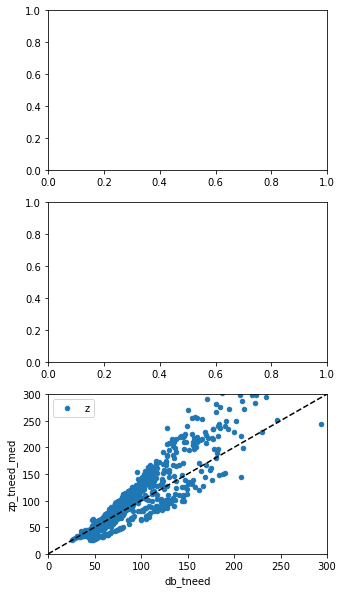

In [37]:
fig,ax= plt.subplots(3,1,figsize=(5,10))
plt.subplots_adjust(hspace=0.2)
for cnt,band in enumerate(['g','r','z']):
    isBand= mos['db_band'] == band
    if np.any(isBand):
        mos[isBand].plot(ax=ax[cnt], kind='scatter', 
                         x='db_tneed',y='zp_tneed_med',
                         label=band,
                         xlim=(0,300),ylim=(0,300))
        ax[cnt].plot([0,300],[0,300],'k--')


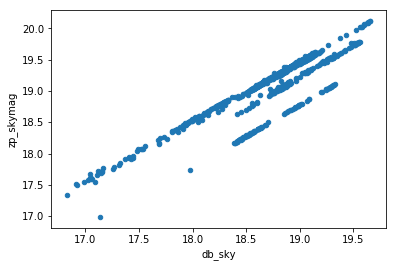

In [69]:
mos.plot(kind='scatter', 
         x='db_sky',y='zp_skymag',
         xlim=None,ylim=None)

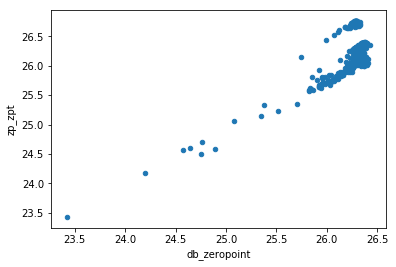

In [40]:
mos.plot(kind='scatter', 
         x='db_zeropoint',y='zp_zpt')

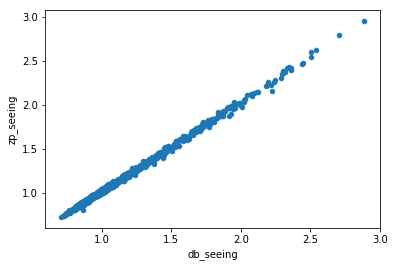

In [43]:
px_scale= 0.262
mos['zp_seeing']= mos.loc[:,'zp_fwhm'] * px_scale
mos.plot(kind='scatter', 
         x='db_seeing',y='zp_seeing')

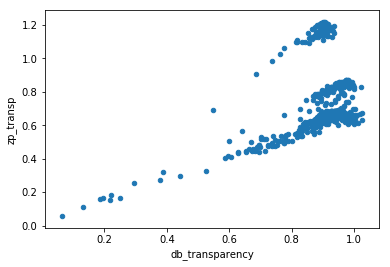

In [50]:
mos.plot(kind='scatter', 
         x='db_transparency',y='zp_transp')